Estrutura de Dados - Análise de Algoritmos
==========================================

Capítulos 2 e 3 do livro texto sugerido:
Introduction to Algorithms, Fourth Edition
By Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest and Clifford Stein
https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/

Conteúdo
========

Apesar de esta ser uma disciplina de estruturas de dados, devemos ter noção de como podemos analisar o comportamento de algoritmos.

Este comportamento tipicamente está atrelado a alguma métrica, como, por exemplo, o tempo gasto para executar o algoritmo ou quantidade de memória necessária para uma dada implementação do algoritmo.

A análise é feita com objetivo de avaliar o quão escalável é um algoritmo $A$ segundo o número $n$ de parâmetros processados.

O algoritmo $A(n)$, por exemplo, pode ser constante, independendo do tamanho da entrada.

Por exemplo, um algoritmo que remove o último elemento de uma lista.

In [110]:
import time
# Cria um decorador de funções com Python
# O decorador envelopa a função func, chamando
# func_wrapper no seu lugar.
# Func_wrapper no que lhe concerne, realiza operações adicionais
# de medição de tempo e impressão
def mede_tempo(func):
    def func_wrapper(*args):
        t_inicio = time.time()
        resultado = func(args)
        t_fim = time.time()
        print(f"Tempo gasto com {func.__name__}(n={len(*args)}): {t_fim-t_inicio}s")
        return resultado
    return func_wrapper

# Imprime tempo necessário para se remover o último elemento da lista
@mede_tempo
def algoritmoRemoveUltimoElemento(lista):
    return lista[-1]

algoritmoRemoveUltimoElemento([0, 1]) # n = 2
algoritmoRemoveUltimoElemento([0, 1, 2]) # n = 3
algoritmoRemoveUltimoElemento([0, 1, 2, 4]) # n = 4
algoritmoRemoveUltimoElemento(list(range(10000))) # n = 10000


Tempo gasto com algoritmoRemoveUltimoElemento(n=2): 2.6226043701171875e-06s
Tempo gasto com algoritmoRemoveUltimoElemento(n=3): 1.6689300537109375e-06s
Tempo gasto com algoritmoRemoveUltimoElemento(n=4): 1.430511474609375e-06s
Tempo gasto com algoritmoRemoveUltimoElemento(n=10000): 1.9073486328125e-06s


Se observar os tempos acima, perceberá que o tempo tomado pelo algoritmo pode flutuar segundo a utilização do sistema operacional, porém não escala com o tamanho da entrada.

Isto implica em $A(n) = \Theta(c)$, sendo $c$ uma constante e $\Theta$ o limiar assintótico inferior e superior de uma dada função.

Mas o que é esse tal limiar assintótico $\Theta$?

$\Theta(g(n))$ é definido como uma função, que a partir de certo $n>n_0$ passa a se comportar de uma forma estável, onde não se cruzará jamais com $g(n)$, dadas duas constantes $c1$ e $c2$ multiplicadas por $g(n)$ que servem de limiares inferiores e superiores.

Mathematicamente, $\Theta(g(n)) = {f(n): \exists f(n) \mid 0 \leq ci\ g(n) \leq f(n) \leq cs\ g(n) \forall n \ge n_0}$

Existem também notações assintóticas que servem apenas como limiares superiores, $O$, ou como limiares inferiroes, $\Omega$.

### Diagramas de funções assintóticas $\Theta, O, \Omega$ (Capítulo 3 do livro texto sugerido)
![](./02_analise_de_algoritmos/assymptotics.png)

Mas que raios tudo isso significa? Vejamos com o problema da ordenação.
Começemos com um vetor com 10 mil inteiros aleatórios.

In [122]:
import random
inteirosAleatorios = [random.randint(0, 10000) for i in range(10000)]
print(inteirosAleatorios[:100])

[8682, 6904, 8526, 2528, 6557, 9479, 1415, 2205, 2971, 4322, 1902, 9045, 4948, 9611, 3173, 7464, 5243, 7066, 8620, 9064, 9676, 767, 4817, 1346, 251, 1533, 5589, 4330, 7878, 8232, 7916, 578, 451, 6774, 7059, 2044, 481, 9841, 3236, 2302, 91, 42, 1661, 4433, 7488, 3681, 3351, 9268, 562, 2969, 7134, 5547, 6812, 1091, 9438, 2760, 7456, 7006, 438, 21, 7211, 582, 2245, 1982, 342, 656, 7334, 4651, 8349, 5090, 2107, 1708, 7754, 3509, 9297, 3769, 6874, 6606, 538, 5152, 1626, 4486, 2770, 9852, 1644, 6172, 7357, 2061, 9113, 2752, 7382, 4664, 2461, 2505, 9400, 5411, 9809, 3437, 308, 6872]


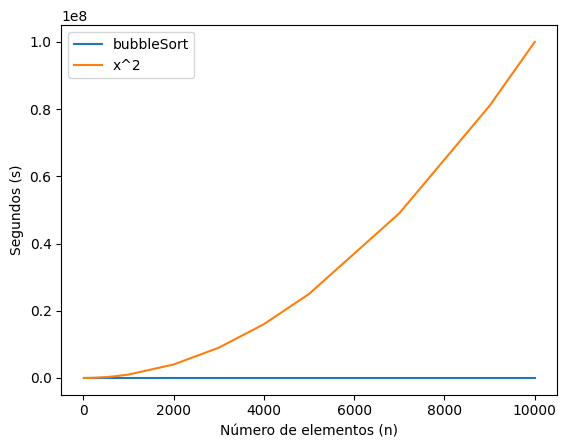

In [112]:
# Esta função coletará o tempo para ordenação de 10, 100, 1000 e 10000 elementos
# e retornará com a lista ordenada
x = [10, 20, 50, 100, 200, 500, 700, 1000, 2000, 3000, 4000, 5000, 7000, 9000, 10000]
def medeTempoOrdenacao(funcao, lista):
    y = []
    for i in x:
        t_inicio = time.time()
        if funcao(lista[:i]) != sorted(lista[:i]):
            raise Exception(f"Algo errado na implementação de {funcao.__name__}")
        t_fim = time.time()
        y.append(t_fim-t_inicio)
    return y

# Implementação do Bubble Sort $O(n)=n^2$
# https://youtu.be/TZRWRjq2CAg
def bubbleSort(lista):
    for i in range(len(lista)):
        for j in range(i+1, len(lista)):
            if lista[i] > lista[j]:
                temp = lista[i]
                lista[i] = lista[j]
                lista[j] = temp
    return lista

def funcaoQuadratica(x):
    return x*x

assintoticaQuadratica = list(map(funcaoQuadratica, x))

from matplotlib import pyplot as plt
plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
temposBubbleSort = medeTempoOrdenacao(bubbleSort, inteirosAleatorios)
plt.plot(x, temposBubbleSort, label="bubbleSort")
plt.plot(x, assintoticaQuadratica, label="x^2")
plt.legend()

A primeira impressão é que a nossa análise falhou miserávelmente. Porém, lembrem-se das constantes que multiplicam as assintóticas superiores e inferiores.

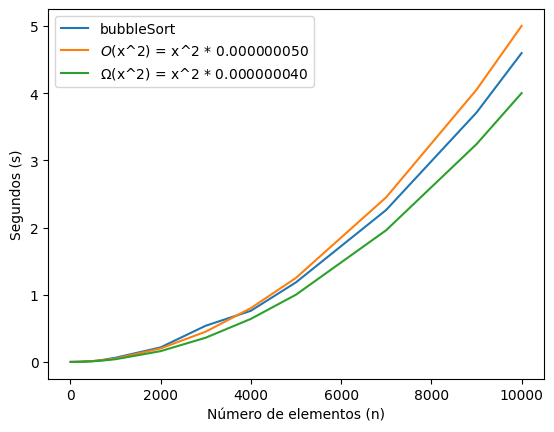

In [120]:
plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
plt.plot(x, temposBubbleSort, label="bubbleSort")
plt.plot(x, [0.000000050*y for y in assintoticaQuadratica], label="$O$(x^2) = x^2 * 0.000000050")
plt.plot(x, [0.000000040*y for y in assintoticaQuadratica], label="$\Omega$(x^2) = x^2 * 0.000000040")
plt.legend()

No final das curvas, podemos ver bem que o Bubble sort tem sim, complexidade assintótica de $\Theta(n^2)$.

Lembrem-se, porém que isto vale a partir de um certo limiar $n_0$ dadas as constantes $ci$ e $cs$ escolhidas.

Para vermos o limiar, podemos plotar menos elementos.

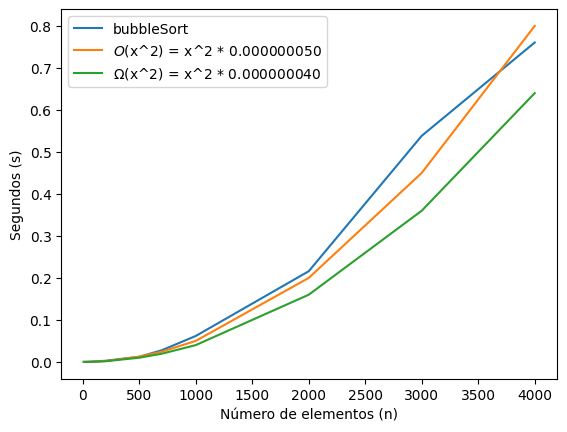

In [114]:
plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
pontosParaPlotar = 11
plt.plot(x[:pontosParaPlotar], temposBubbleSort[:pontosParaPlotar], label="bubbleSort")
plt.plot(x[:pontosParaPlotar], [0.000000050*y for y in assintoticaQuadratica][:pontosParaPlotar], label="$O$(x^2) = x^2 * 0.000000050")
plt.plot(x[:pontosParaPlotar], [0.000000040*y for y in assintoticaQuadratica][:pontosParaPlotar], label="$\Omega$(x^2) = x^2 * 0.000000040")
plt.legend()

Agora que sabemos o que significa essa complexidade assintótica, e que $BubbleSort(n)=\Theta(n^2)$,
temos que pensar como melhorar a ordenação, para poder ordenar conjuntos maiores de dados.

Existe um algoritmo de mesma complexidade assintótica que o Bubble sort, porém as constantes são distintas.

In [115]:
def insertionSort(lista):
    for i in range(len(lista)):
        min_val = lista[i]
        min_j = i
        for j in range(i+1, len(lista)):
            if lista[j] < min_val:
                min_j = j
                min_val = lista[j]

        temp = lista[i]
        lista[i] = lista[min_j]
        lista[min_j] = temp
    return lista

temposInsertionSort = medeTempoOrdenacao(insertionSort, inteirosAleatorios)

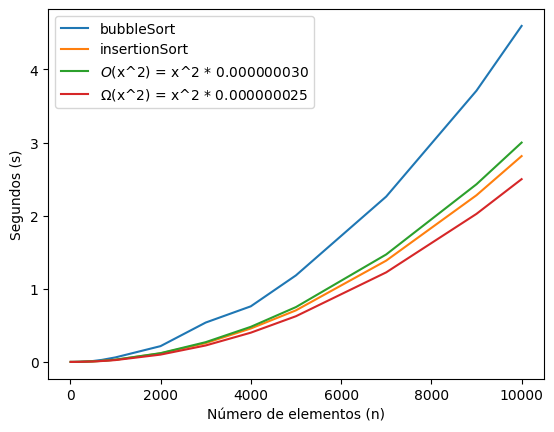

In [116]:
plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
plt.plot(x, temposBubbleSort, label="bubbleSort")
plt.plot(x, temposInsertionSort, label="insertionSort")
plt.plot(x, [0.000000030*y for y in assintoticaQuadratica], label="$O$(x^2) = x^2 * 0.000000030")
plt.plot(x, [0.000000025*y for y in assintoticaQuadratica], label="$\Omega$(x^2) = x^2 * 0.000000025")
plt.legend()

Como podem observar, a estratégia do Insertion Sort é bem mais eficiente que a do Bubble Sort, apesar de ambos terem complexidade assintótica quadrática, diferindo apenas em termos das constantes que multiplicam os seus limiares inferiores e superiores.

Existem, porém, estratégias mais eficientes, como dividir para conquistar.
Duas destas estratégias são QuickSort e MergeSort.
No caso médio, ambas tem complexidade assintótica de $O(n)=n\ log(n)$.

In [117]:
def mergeSort(lista):
    # Se só tem um elemento, já está ordenada
    if len(lista) <= 1:
        return lista
    # Se tem dois elementos, comparação é trivial
    if len(lista) == 2:
        if lista[0] > lista[1]:
            return [lista[1], lista[0]]
        else:
            return lista
    metade = len(lista)//2
    metadeEsquerdaOrdenada = mergeSort(lista[:metade])
    metadeDireitaOrdenada = mergeSort(lista[metade:])
    # Junta metades
    listaFinal = []
    while True:
        if metadeEsquerdaOrdenada and not metadeDireitaOrdenada:
            listaFinal.extend(metadeEsquerdaOrdenada)
            break
        elif not metadeEsquerdaOrdenada and metadeDireitaOrdenada:
            listaFinal.extend(metadeDireitaOrdenada)
            break
        else:
            if metadeEsquerdaOrdenada[0] < metadeDireitaOrdenada[0]:
                listaFinal.append(metadeEsquerdaOrdenada[0])
                metadeEsquerdaOrdenada.pop(0)
            else:
                listaFinal.append(metadeDireitaOrdenada[0])
                metadeDireitaOrdenada.pop(0)
    return listaFinal

temposMergeSort = medeTempoOrdenacao(mergeSort, inteirosAleatorios)

Agora plotamos os resultados comparando as três estratégias de ordenação diferentes.

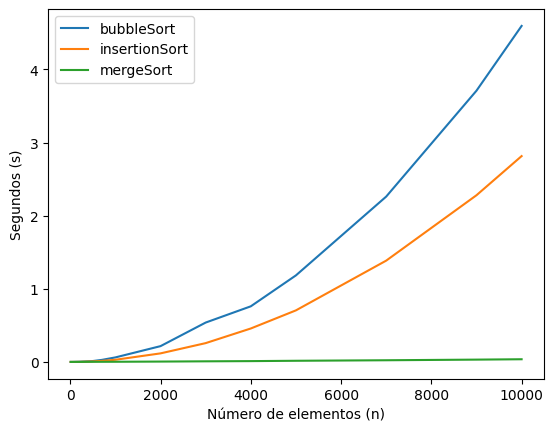

In [118]:
plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
plt.plot(x, temposBubbleSort, label="bubbleSort")
plt.plot(x, temposInsertionSort, label="insertionSort")
plt.plot(x, temposMergeSort, label="mergeSort")
plt.legend()

O que acharam da diferença do comportamento?

Plotemos as assintóticas de $n\ log(n)$ para confirmar que o $MergeSort(n) = \Theta(n\ log(n))$

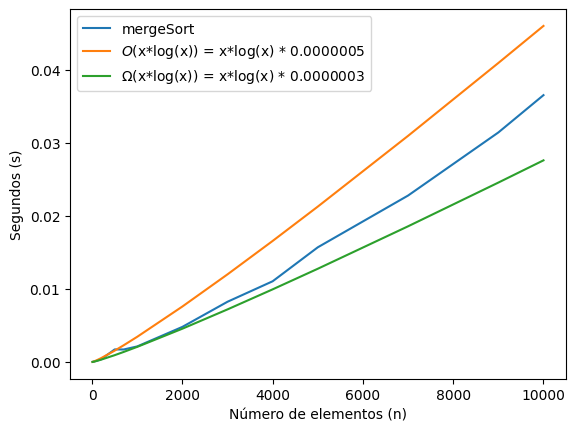

In [119]:
import math
def funcaoNLogN(x):
    return x*math.log(x)

assintoticaNLogN = list(map(funcaoNLogN, x))

plt.ylabel("Segundos (s)")
plt.xlabel("Número de elementos (n)")
plt.plot(x, temposMergeSort, label="mergeSort")
plt.plot(x, [0.0000005*y for y in assintoticaNLogN], label="$O$(x*log(x)) = x*log(x) * 0.0000005")
plt.plot(x, [0.0000003*y for y in assintoticaNLogN], label="$\Omega$(x*log(x)) = x*log(x) * 0.0000003")
plt.legend()

E acreditem, existem algoritmos ainda mais eficientes.

O gráfico abaixo mostra diferentes tipos de limiares superiores de complexidade assintótica ($O$).

### Diagramas de limiares superiores assintóticos $O$ (https://www.bigocheatsheet.com/)
![](./02_analise_de_algoritmos/bigO_complexity_chart.png)